In [1]:
import matplotlib.image as img
from PIL import Image 
import numpy as np 
import pandas as pd 
import random as r
import time
from scipy.spatial.distance import cdist
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from TylerJLang_hw1_code import *
from sklearn.cluster import KMeans # Only used  for Part 3, which Profesor Xie gave us permission to use!! 

<span style="font-family:Ariel; font-size:3em;">Part 1: Concept Questions</span>

# Question 1

_What's the main difference between supervised and unsupervised learning?_

The main difference between these two types of machine learning lies in the input data: If the input data **has an outcome variable** or is **labeled** , and this outcome variable/label is being input to train the model, then it is a **supervised learning** problem. In supervised learning problems, the model will predict the values of the same outcome variable / label for new datapoints. In these types of models, model error can be measured based on its ability to correctly measure or classify the label of the data points being used to test the model in prediction.

In contrast, if no outcome variable is being used to train the model and then predicted on, or in other words, the data is not labeled, then it is an **unsupervised learning** algorithm. The most common type of unsupervised learning algorithm is a clustering algorithm, in which the model groups, or clusters, data points together based on their independent variables, with no sense of a right or wrong answer, as the model does not include any dependent variable. 

# Question 2

_Will different initializations for k-means lead to different results?_

Yes, they will. K-means is an algorithm that is NP-hard, meaning that it is an arduous and computationally difficult problem to solve, due to the characteristic of the objective function being minimized, which might have multiple local minimums. Thus, standard K-means algorithms are heuristics, in that cluster centers are randomly initialized, and then updated based on a two-step process, in which points are re-categorizes based on their closes centroid, and then centroids are re-centered to be in the middle of their cluster, which is a process repeated multiple times until finding a local minimum. Due to these per-cycle updates that use distance measures to determine centroid assignment, final assignment can very much differ based on the location at which the original centroids were initialized. If we imagine a uniform 30x30 scattering of points, one can imagine the difference the final clusters would have if k=3 centroids were initialized quite close together, uniformly in a horizontal line, or scattered in a V shape, for example. Final outcomes are dependent on the actual location of each centroid, as well as the distance between each centroid, and these differences will be more pronounced on data that has less "natural clusters."

# Question 3

_Give a short proof why K-means algorithm will always converge in finite number of iterations_:

Due to the nature of the distance objective function, and the way in which K-means cycles through point and centroid assignment, the function will always converge in a finite number of iterations. While the objective function may not be convex, it will have ranges in which it is locally convex, and thus a local minimum can always be found, but it is not clear with the process of K-means if the function ever arrives at a global minimum, or simply a local minimum. In terms of how K-means operates, when the centroids are randomly placed, points are assigned to the centroid that is closest, based on the similarity function being used. Then, centroids are re-placed to minimize the distance between it and all the points assigned to it, by being placed in the mean/median. Finally, points are re-labeled, again minimizing the distance from the point to a particular centroid. Due to this process, and the way in which points cannot flip flop back and forth between one centroid and another for an infinite amount of times (the worst case scenario is that the point is equi-distant from 2 or more centroids, but this situation would not lead to a greater total distance from points to their centroids, so thus the program would still stop iterating as the centroids do not change location). Thus, whether the final solution reaches a local or a global minimum, the function will still always converge to _a minimum_ within a finite number of iterations. 

# Question 4

The main difference between k-means and generalized k-means algorithms is in the objective function, which in this case, is the distance, or similarity function. Many K-means algorithms use euclidian distance to measure the distance between data points and the final centroid, while a generic version/formula can use any distance equation, including a **Minkowski distance** equation, in which "p" is a value that can be chosen by the one writing the code. When p=1, it is effectively using the Manhattan distance equation. When p=2, it is using the Euclidian distance. When p = infinity, it is simply taking the max value between the values of the point vectors as the distance.

Based on the distance formula used, the algorithm can lead to different results, which is highly dependent on the underlying structure of the data, and the purpose of analysis and clustering. For example, if we are trying to cluster certain types of stores or restaurants based on a 2d geographical space in which streets are grid-like (for example, in Manhattan!), then clustering based on the manhattan distance might make much more sense, as it would group places that are more closely located in terms of *walking distance*. Depending on the equation used, points will be grouped into different clusters, and so the purpose of the "distance" being measured becomes important. The structure of the data might help determine which function to use to get the best, most "natural" clusters.

While Minkowski/Manhattan distances are referred to above, they serve simply as examples, and not an exhaustive list. There are a myriad of possible objective functions that could be used as the similarity function, depending on the task at hand. For example, if NLP is being performed, the edit distance could serve as a useful distance function, when looking at similarity of words or strings of characters. When the data is all binary, the Hamming distance can be used. 

In the end, as long as the similarity function has **symmetry, positive seperability, and triangular inequality**, it is a good candidate, depending on the problem at hand.

# Question 1 Part 5

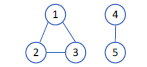

In [2]:
a = np.array([[0,1,1,0,0],[1,0,1,0,0],[1,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]])
d = np.diag([2,2,2,1,1])
L = d - a 
v,x = np.linalg.eig(L)
x[:,[1,4]]

array([[-0.57735027,  0.        ],
       [-0.57735027,  0.        ],
       [-0.57735027,  0.        ],
       [ 0.        ,  0.70710678],
       [ 0.        ,  0.70710678]])

For this question, I first created a matrix of 0s and 1s to represent the network seen in the image of nodes and edges. As can be clearly seen, there are two obvious communities, the first among points 1-3, and the second consisting of points 4 and 5. 

Using a graph Laplacian matrix and findings its eigenvectors corresponding to the zero-eigen values, and then looking for unique row-vectors in the new matrix made of the columns of the eigen vector matrix, there can be seen two unique points --> (-0.57725027,0) and (0,0.70710678) , demonstrating that there are two communities present in the data.

<span style="font-family:Ariel; font-size:3em;">Part 2: Image Compression Using Clustering</span>

In [3]:
k_list = [2,4,8,16]

# Photo loads

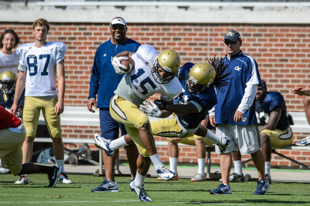

In [4]:
image = Image.open(r'data/football.bmp')
image
data = np.array(image)
df = data.reshape(((data.shape[0]*data.shape[1]),data.shape[2]))
display(image.resize((int(image.size[0]/2),int(image.size[1]/2))))

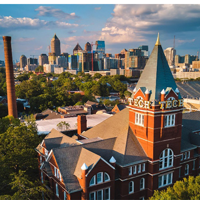

In [5]:
image2 = Image.open(r'data/GeorgiaTech.bmp')
image2
data2 = np.array(image2)
df2 = data2.reshape(((data2.shape[0]*data2.shape[1]),data2.shape[2]))
display(image2.resize((int(image2.size[0]/2),int(image2.size[1]/2))))

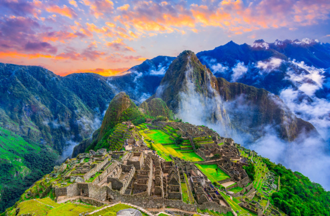

In [6]:
image3 = Image.open(r'data/shutterstock_1387848629.jpg')
image3
data3 = np.array(image3)
df3 = data3.reshape(((data3.shape[0]*data3.shape[1]),data3.shape[2]))
display(image3.resize((int(image3.size[0]/2),int(image3.size[1]/2))))

# Euclidian Distance

Original number of clusters called: 2
Number of Clusters: 2
Iterations: 31 

Centroids: 
 [[189.91441097 182.64826808 172.45584686]
 [ 74.59407487  76.04869875  66.44037077]] 

Runtime of K-Means: 0.8351056575775146 seconds


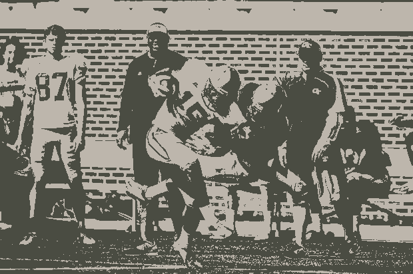

Original number of clusters called: 4
Number of Clusters: 4
Iterations: 35 

Centroids: 
 [[182.28367015 166.69982352 148.67129213]
 [212.76599581 217.42816254 220.33402448]
 [ 35.63656913  42.20839938  45.50039282]
 [121.11760406 115.964445    93.0774777 ]] 

Runtime of K-Means: 1.7150774002075195 seconds


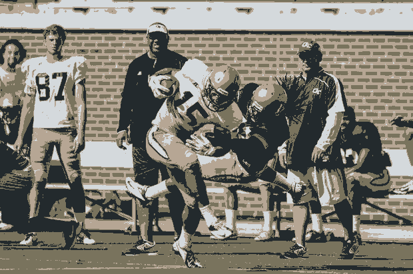

Original number of clusters called: 8
Number of Clusters: 6
Iterations: 74 

Centroids: 
 [[124.9029657  116.79525342  84.83728882]
 [155.82171849 142.06075672 125.88814921]
 [ 54.45613429  71.22090892  85.20874392]
 [215.15558357 220.53101124 224.56121215]
 [ 29.3771859   29.33900229  25.60954044]
 [191.49635684 178.9313872  162.33883699]] 

Runtime of K-Means: 4.973987340927124 seconds


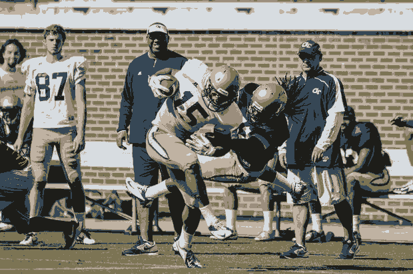

Original number of clusters called: 16
Number of Clusters: 9
Iterations: 94 

Centroids: 
 [[160.90799271 111.22065114  87.4402725 ]
 [188.42780269 165.28361059 138.03949081]
 [112.54878822 127.64884612  88.58942899]
 [122.4124463  135.04146595 146.102721  ]
 [220.02225278 224.86195149 227.86320165]
 [ 73.11547035  70.36395771  53.6056939 ]
 [ 23.70241664  24.66644073  23.89856357]
 [ 24.39020622  63.81675287 116.09148922]
 [189.81478502 189.35661012 187.47908745]] 

Runtime of K-Means: 9.882508039474487 seconds


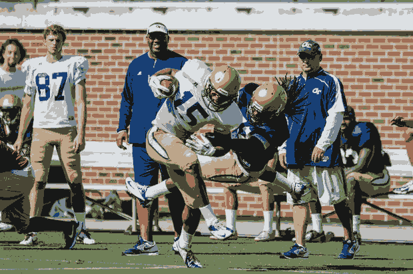

In [7]:
for k in k_list:
    start = time.time()
    l1, c1 = kmeans_tjl(k,df)
    end = time.time()
    print(f'Runtime of K-Means: {end-start} seconds')
    compress_img(df,data.shape,l1,c1)
    print('======================================================================')

Original number of clusters called: 2
Number of Clusters: 2
Iterations: 8 

Centroids: 
 [[172.03466717 161.22584305 153.36686159]
 [ 60.27504566  56.21564111  45.89597803]] 

Runtime of K-Means: 0.16410422325134277 seconds


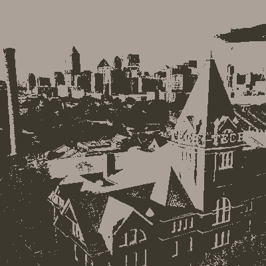

Original number of clusters called: 4
Number of Clusters: 3
Iterations: 39 

Centroids: 
 [[ 58.20907658  53.0554997   41.5877059 ]
 [216.94630127 174.92190507 143.21013255]
 [122.8399765  142.02235018 156.70561692]] 

Runtime of K-Means: 0.8935632705688477 seconds


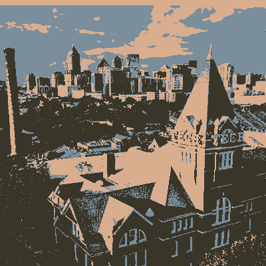

Original number of clusters called: 8
Number of Clusters: 8
Iterations: 71 

Centroids: 
 [[133.43177544 107.19990249  78.58640384]
 [200.99468085 176.87472138 162.41013171]
 [250.39753621 241.52771766 232.10687531]
 [ 37.30338898  32.55318373  28.55925014]
 [217.79837793 140.20435079  79.79822633]
 [122.07363633 152.29113401 175.67747493]
 [ 90.32595366  74.22132576  32.63486736]
 [ 58.92846628  78.62711957  90.71228395]] 

Runtime of K-Means: 3.817230701446533 seconds


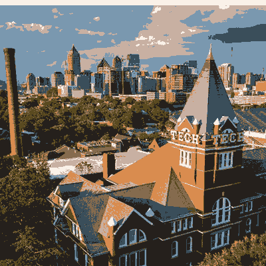

Original number of clusters called: 16
Number of Clusters: 14
Iterations: 75 

Centroids: 
 [[ 80.65444325 119.95449679 145.06397216]
 [223.65354087 195.09741264 175.98154829]
 [253.7470808  251.49135918 246.81597384]
 [ 53.75567874  41.9300476   29.6651202 ]
 [ 91.96557449  87.60235911  87.70712101]
 [ 87.63178976  72.74550606  32.09740133]
 [209.74781317 159.55537217 113.55900314]
 [151.01079403 121.25018483  98.19384888]
 [159.70943081 165.13856537 177.64134265]
 [113.21267694 153.01631685 180.44683076]
 [ 29.55556431  25.76395509  23.27386252]
 [135.13945006 103.49102132  39.12177329]
 [ 39.75084824  60.3821715   72.3146206 ]
 [234.23501348 118.99087326  45.40344327]] 

Runtime of K-Means: 7.244646310806274 seconds


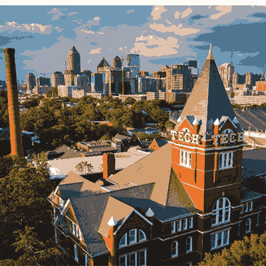

In [8]:
for k in k_list:
    start = time.time()
    l2, c2 = kmeans_tjl(k,df2)
    end = time.time()
    print(f'Runtime of K-Means: {end-start} seconds')
    compress_img(df2,data2.shape,l2,c2)
    print('======================================================================')

Original number of clusters called: 2
Number of Clusters: 2
Iterations: 10 

Centroids: 
 [[177.68700703 163.01663699 177.41135666]
 [ 55.28689402  89.48519414  87.59221571]] 

Runtime of K-Means: 0.3375279903411865 seconds


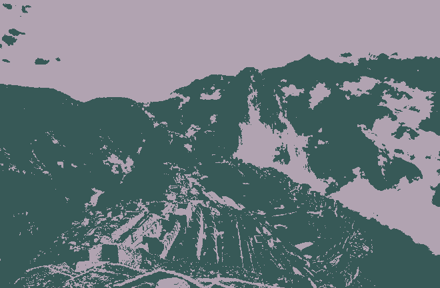

Original number of clusters called: 4
Number of Clusters: 4
Iterations: 35 

Centroids: 
 [[211.47734897 176.12393847 170.64267581]
 [ 85.26334394 103.95219463  45.56930072]
 [ 26.51514955  75.57980925 124.11928891]
 [131.55721039 143.66974676 191.48290796]] 

Runtime of K-Means: 1.8302505016326904 seconds


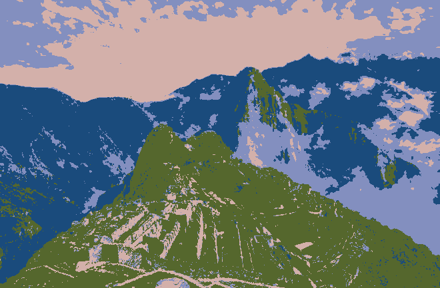

Original number of clusters called: 8
Number of Clusters: 8
Iterations: 47 

Centroids: 
 [[ 44.28291728  60.01894273  56.14716104]
 [115.18063936 132.07012808 187.33931407]
 [ 20.48130022  76.34796435 139.9268576 ]
 [109.32645805 106.96419476  88.26442926]
 [223.55357892 170.0716903  148.33215854]
 [ 28.15475285 118.81882129  20.22807351]
 [180.83410176 176.69363333 207.66482244]
 [147.51507486 165.9523484   13.81848636]] 

Runtime of K-Means: 4.593099355697632 seconds


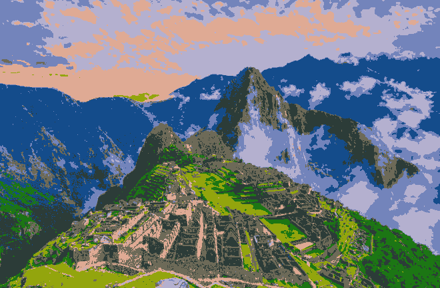

Original number of clusters called: 16
Number of Clusters: 15
Iterations: 94 

Centroids: 
 [[  8.77532248  75.54615141 166.73847536]
 [ 28.75832097  50.89225143  35.80888276]
 [143.75640577 162.27656596 215.48221159]
 [171.00778992 175.29564016  11.65900239]
 [101.08218449 124.15058289 183.67068157]
 [131.98293883 121.89640332  94.00317655]
 [102.6001588  149.48967786  12.75181488]
 [ 19.17422096 121.09348442  22.48450779]
 [230.85529729 178.57194446 164.44575556]
 [ 16.84008755  65.65815481 108.10250713]
 [176.18889589 145.99394409 163.68722446]
 [ 83.77346056  81.25640146  63.46903961]
 [197.10217703 188.63487136 208.38410493]
 [246.2085296  168.83437301 114.79096117]
 [ 62.56660737  98.63266189 131.0376905 ]] 

Runtime of K-Means: 17.039729118347168 seconds


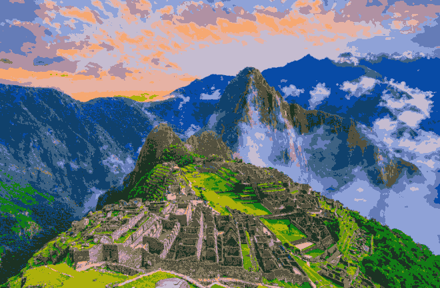

In [9]:
for k in k_list:
    start = time.time()
    l3, c3 = kmeans_tjl(k,df3)
    end = time.time()
    print(f'Runtime of K-Means: {end-start} seconds')
    compress_img(df3,data3.shape,l3,c3)
    print('======================================================================')

# Manhattan Distance

Original number of clusters called: 2
Number of Clusters: 2
Iterations: 11 

Centroids: 
 [[193. 181. 169.]
 [ 74.  77.  71.]]
Runtime of K-Means: 0.20744991302490234 seconds


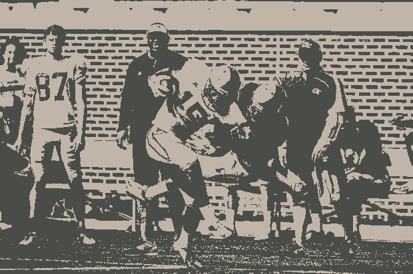

Original number of clusters called: 4
Number of Clusters: 4
Iterations: 7 

Centroids: 
 [[185. 167. 151.]
 [117. 113.  87.]
 [217. 220. 222.]
 [ 31.  41.  35.]]
Runtime of K-Means: 0.22739148139953613 seconds


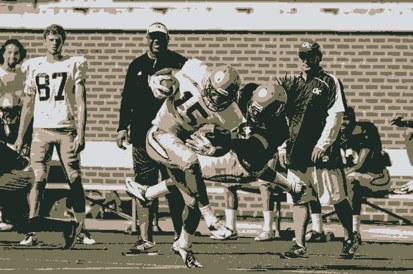

Original number of clusters called: 8
Number of Clusters: 8
Iterations: 13 

Centroids: 
 [[ 17.  20.  18.]
 [ 96.  94.  73.]
 [220. 223. 224.]
 [ 57.  55.  40.]
 [125. 129.  92.]
 [193. 184. 174.]
 [ 20.  63. 116.]
 [178. 154. 137.]]
Runtime of K-Means: 0.6896798610687256 seconds


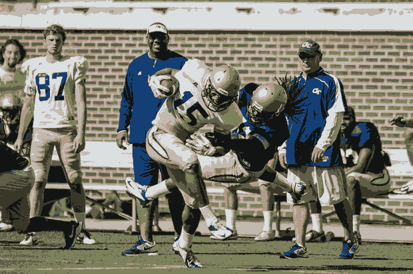

Original number of clusters called: 16
Number of Clusters: 11
Iterations: 38 

Centroids: 
 [[ 52.  50.  36.]
 [118. 140.  87.]
 [ 15.  18.  17.]
 [112. 124. 137.]
 [176. 150. 129.]
 [197. 201. 206.]
 [159. 106.  84.]
 [ 18.  62. 115.]
 [193. 176. 159.]
 [223. 227. 227.]
 [ 85.  85.  67.]]
Runtime of K-Means: 2.9188954830169678 seconds


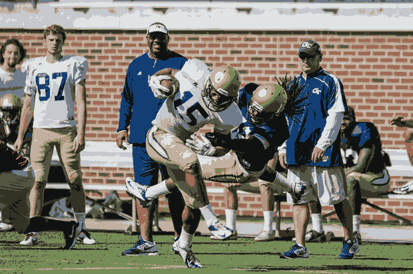

In [10]:
for k in k_list:
    start = time.time()
    l1, c1 = kmeans_manhattan_tjl(k,df)
    end = time.time()
    print(f'Runtime of K-Means: {end-start} seconds')
    compress_img(df,data.shape,l1,c1)
    print('======================================================================')

Original number of clusters called: 2
Number of Clusters: 2
Iterations: 7 

Centroids: 
 [[ 51.  52.  34.]
 [166. 159. 166.]]
Runtime of K-Means: 0.09673929214477539 seconds


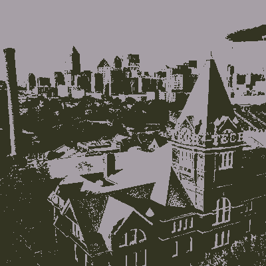

Original number of clusters called: 4
Number of Clusters: 4
Iterations: 19 

Centroids: 
 [[ 39.  34.  27.]
 [136. 157. 175.]
 [ 96.  90.  77.]
 [222. 173. 139.]]
Runtime of K-Means: 0.31346821784973145 seconds


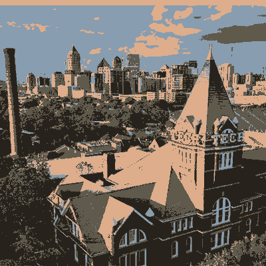

Original number of clusters called: 8
Number of Clusters: 6
Iterations: 20 

Centroids: 
 [[135. 158. 175.]
 [210. 150. 102.]
 [ 35.  29.  25.]
 [236. 204. 187.]
 [ 63.  66.  64.]
 [114.  99.  78.]]
Runtime of K-Means: 0.5534501075744629 seconds


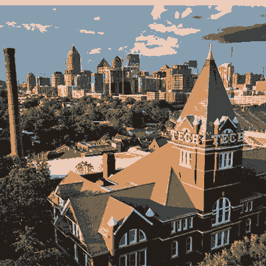

Original number of clusters called: 16
Number of Clusters: 8
Iterations: 30 

Centroids: 
 [[ 89. 131. 154.]
 [142. 162. 180.]
 [210. 147.  97.]
 [255. 255. 255.]
 [116.  96.  69.]
 [216. 186. 174.]
 [ 62.  64.  62.]
 [ 35.  29.  24.]]
Runtime of K-Means: 1.2721428871154785 seconds


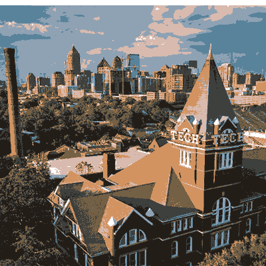

In [11]:
for k in k_list:
    start = time.time()
    l2, c2 = kmeans_manhattan_tjl(k,df2)
    end = time.time()
    print(f'Runtime of K-Means: {end-start} seconds')
    compress_img(df2,data2.shape,l2,c2)
    print('======================================================================')

Original number of clusters called: 2
Number of Clusters: 2
Iterations: 6 

Centroids: 
 [[ 48.  82.  88.]
 [175. 164. 185.]]
Runtime of K-Means: 0.1411304473876953 seconds


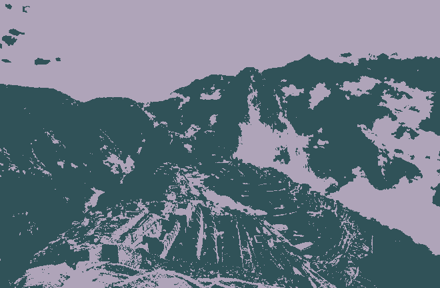

Original number of clusters called: 4
Number of Clusters: 4
Iterations: 25 

Centroids: 
 [[ 85. 100.  55.]
 [ 13.  69. 121.]
 [136. 142. 192.]
 [206. 179. 178.]]
Runtime of K-Means: 0.7310543060302734 seconds


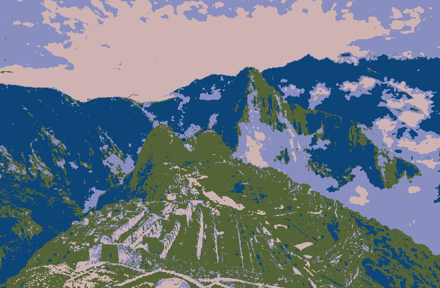

Original number of clusters called: 8
Number of Clusters: 8
Iterations: 27 

Centroids: 
 [[195. 185. 205.]
 [ 75. 106. 151.]
 [  5.  67. 129.]
 [ 68.  73.  64.]
 [134. 134.  76.]
 [140. 150. 203.]
 [232. 171. 150.]
 [ 15.  97.  14.]]
Runtime of K-Means: 1.5226414203643799 seconds


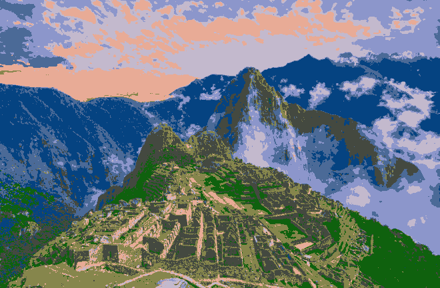

Original number of clusters called: 16
Number of Clusters: 16
Iterations: 34 

Centroids: 
 [[107. 149.   6.]
 [  2.  72. 172.]
 [201. 191. 205.]
 [ 61.  97. 137.]
 [139. 126. 101.]
 [ 12. 113.   8.]
 [105. 127. 186.]
 [145. 164. 217.]
 [100.  94.  73.]
 [169. 177.   5.]
 [  4.  64. 125.]
 [ 12.  43.  31.]
 [181. 152. 174.]
 [ 36.  70.  89.]
 [ 69.  67.  47.]
 [240. 175. 151.]]
Runtime of K-Means: 3.6877899169921875 seconds


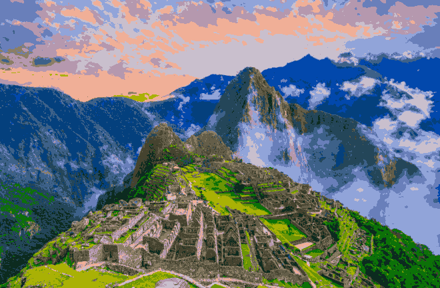

In [12]:
for k in k_list:
    start = time.time()
    l3, c3 = kmeans_manhattan_tjl(k,df3)
    end = time.time()
    print(f'Runtime of K-Means: {end-start} seconds')
    compress_img(df3,data3.shape,l3,c3)
    print('======================================================================')

# Analysis of Part 2:

Performing K-means with the three photos above (referred to from here on as Football, Georgia Tech, and Machu Picchu) -- both with Euclidean distance and Manhattan distance -- has lead to many interesting discoveries concerning the use of clustering in photos, and how such methods can be used to reduce the data in a photo by reducing the color values. As can be seen from the examples above, the most prominent difference in the resulting photos is due to the different K-values, less so than the different distance, or similarity, objective function. Analysis will thus be broken down in terms of the k-values, as well as the difference seen by the change in similarity function used. 

**Comparing K-Values** 

When running K-means, centering the centroids, when encompasing a large cluster of pixels, lead to very grey and murky colors, due to the structure of the data being comprised of 3 columns. When re-centering the cluster at the mean, the mean value of each column is taken, and then, averaging over many different R,G,B values can lead to very indistinct colors that are most likely not even present in the photo. Even when using the Manhattan distance function, in which we use actual column medians to re-center the centroids, it also leads to these grey colors, due to taking median values per R,G,B value. This is most prominent when K=2. However, even just increasing K from 2 to 4 has a notable difference in the formation of colors, and colors that are present in the photo start to emerge, like the beiges in the football photo, the oranges in the Georgia Tech photo, and the greens in the Machu Picchu photo. This is due to the tightening of the clusters. Perhaps when K=2, the clusters are much too broad, due to the multi-tonality of the photos. But just be increasing K by a bit, the very prominent colors that form natural clusters in the data start to get clustered correctly by K-means.

I chose the photo of Machu Picchu primarily because it is a more complex and detailed photo, as well as a more colorfully vibrant colors with main dominant colors, rather than the other two, which have less contrasted color palettes. And the differences in the results is quite stark. For photos like the footbal and Georgia Tech photos, in which the colors are more smooth, less separated, and have softer textures (especially for the football photo), the photo is recognizable with just k=4, and looks very close to the original photo with K=8 and K=16. With Machu Picchu, it takes a higher K-value to start to become recognizable due to the high detail (and thus more intricate color clusters needed to be able to distinguish details in the photo, separating light and dark values of colors, for example). Yet, when K is just 4, the vibrant colors already start to appear, due to their tighter natural clusters in the structure of the data. 

What is interesting, and confirms my qualitative assessment of the results, is the number of final nodes that run when choosing K-values of 8 and 16. For example, after running many iterations of the code, thus assessing the results after many different batches of random centroid initializations, setting k=8 and 16 almost never result in a full 8 or 16 clusters for the football and Georgia Tech photos, using neither the Euclidian or Manhattan distances, due to empty clusters being formed, and the program thus reducing K until no empty clusters are randomly formed. This could easily be due to the lack of color variety in the photos, leading to smaller clusters making up the bulk of the photo. However, in contrast, Machu Picchu almost always uses more clusters than either of the other two photos for k=8 and k=16, due to the high color variety. Furthermore, for Machu Picchu, it seems to use more clusters using Manhattan distance and re-centering with the median, than when using Euclidian distance / mean-centering.

**Comparing Similarity Equations -- Euclidian vs Manhattan**

In term of the differences seen with different similarity equations, very few observable differences can be seen in terms of the quality, makeup, or color schemes of the resulting photos. In some of the photos, such as Machu Picchu, the euclidian distance function was able to produce tighter clusters (more vibrant colors that actually exist in the photo) with a lower K, which can be seen by observing the results in which K=4. However, in some cases for certain K-values, the Manhattan distance seems slightly better at creating more defined edges due to the way in which the pixels are clustered and the median color is taken. 

Perhaps the biggest difference with the Manhattan vs the Euclidian distance function algorithms is that the algorithm using the Manhattan distance always seems to converge much, much more quickly, with much fewer iterations. This could easily be due to the nature of the algorithm, in that it adjusts the centroid based on median values, which means that existing column values present in the data are being used to construct the centroids, which should naturally reduce the amount of iterations necessary. The K-means algorithm using the Euclidian distance, on the other hand, takes the mean of the column values to re-center the centroid, which means that the centroid could fall in a more continuous space, thus causing more shifts to be able to tune the results and find the local minimums for the distance values. 

<span style="font-family:Ariel; font-size:3em;">Part 3: Political Blogs</span>

In this question, we were asked to perform spectral clustering to cluster the adjacency matrix connecting nodes which equate to different political blogs and sites. The hypothesis is that sites and blogs with a specific political orientation will be more likely to link each other, creating more closed-off networks, or communities. Thus, to analyze this, we create an adjacency matrix, find the graph Laplacian, and take the eigenvectors corresponding to the k-smallest eigenvalues after decomposing the graph Laplacian into eigenvalues and vectors. Finally, we perform k-means on this group of eigenvectors. 

All of my code can be found in the main code file, TylerJLang_hw1_code.py. I will explain briefly my process below the code cells.

In [13]:
nodes = pd.read_table(r"data/nodes.txt",header=None).rename({0:'ind_ref',1:'site',2:'political_label',3:'blogsite'},axis=1)
edges = pd.read_table(r"data/edges.txt",header=None).rename({0:'ind1',1:'ind2'},axis=1)
new_adj_df, nodes_processed = pre_processing(nodes,edges)
v,x,idx_sorted = spectral_setup(new_adj_df,nodes_processed)

In the function "pre_processing", the nodes and edges data is pre-processed to (1) take out duplicate rows (including symmetrical duplicates, as a=b is a duplicate of b=a), (2) take out edges in which the same index is connected to itself, and (3) remove any nodes which have 0 connections. To do so, I checked each index reference in nodes, to see if it exists in either column of edges. If not, it is removed. Then, the final reduced nodes dataframe is re-indexed, and the new reference and the old reference indices are turned into a dictionary, which I then use to map the old references in the edges dataframe. With the newly mapped columns, I now have a pre-processed edges and nodes dataframe.

Then, the adjacency matrix is created via the new edges dataframe (labeled as new_adj_df), and the adjacency matrix is created to be symmetric. Then, the graph Laplacian is calculated, and the indices of the eigenvalues are sorted, so that the eigenvectors corresponding to the k-smallest eigen values can easily be taken. The sorted indices to be used to extract the eigenvectors is found in idx_sorted. K is assigned within the function call.

Finally, in the code below, k-means is run on this new matrix of selected eigenvectors, and the labels are extracted per-row. These row numbers are then cross-referenced with the pre-processed nodes dataframe, to extract the political parties per row. Then, the data is grouped per k-means label, and the majority political label is found using a value_counts() method, in which the max count per political party label per k-means label is used to determine majority party. Finally, the total counts per-cluster label minus the per-party per-label counts is divided by the total counts per-cluster label, to get the per-cluster mismatch rate, and the total mismatch rate (total mismatches / total nodes). The final output of my spectral_means() function is (1) a dataframe including the k-means label and the majority party label, and (2) the overall mismatch rate. 

I then run this, as instructed, for k=2,5,10,20, and the output of the outputted dataframe is displayed.

In [14]:
k_spec = [2,5,10,20]
for k_i in k_spec:
    print(f'For k={k_i}: ')
    f, mr = spectral_kmeans(k_i,x,idx_sorted,nodes_processed)
    print(f[['political_label','label','totals','mismatch_rate']].rename({'political_label':'majority_party_label','label':'cluster_label','totals':'total_nodes_in_cluster'},axis=1).sort_values(by='cluster_label').reset_index(drop=True))
    print('===== \n')
    print(f'Weighted Mismatch rate: {round(mr,2)}')
    print('==========================================================')
    print('\n')

For k=2: 
   majority_party_label  cluster_label  total_nodes_in_cluster  mismatch_rate
0                     1              0                    1222       0.479542
1                     0              1                       2       0.000000
===== 

Weighted Mismatch rate: 0.48


For k=5: 
   majority_party_label  cluster_label  total_nodes_in_cluster  mismatch_rate
0                     1              0                    1210       0.480165
1                     1              1                       7       0.428571
2                     1              2                       3       0.000000
3                     0              3                       2       0.000000
4                     0              4                       2       0.000000
===== 

Weighted Mismatch rate: 0.48


For k=10: 
    majority_party_label  cluster_label  total_nodes_in_cluster  mismatch_rate
0                      1              0                    1118       0.481216
1                      0       

As can be seen for cases k=[2,5,10], the clustering seems to cluster nearly all the points together in one of the labels/clusters, with the others being tiny -- as little as 2 points. This seems to show that, at least when k is somewhat small, the clustering algorithm cannot detect differences in the data points enough to create those clusters. This is somewhat expected, as it might be assumed that within the political orientations, not all those of the same political standing would all reference each other, but rather that there must be smaller sub-clusters and distinct groups among those of the same standing. Thus, when just asked to split the data into two groups, there is no clean 2-way split, leading to really poor clustering results. The total mismatch rate per k-value is then calculated as the total amount of mismatched points divided by the total count of nodes. As can be seen, the mismatch rate seems to jump quite dramatically from k=10 to k=20. To see exactly when this jump occurs, a for-loop is used to test all k-values from 2 to 30 to see how the mismatch rate changes per k-value.

One of the concerning results shown above are the sizes of the clusters. If the theory stated above were correct - that, with higher k-values, the algorithm would be able to extract more realistic sub-groups of the overall nodes making up each political label - then it would be expected to have more evenly sized clusters, which is certainly not the case. Even when k=20, the majority of the clusters have less than 20 nodes. What is interesting with k=20, however, is that the final result shows two clusters that make up a large majority of the points, and those two clusters represent different political labels. Furthermore, the mismatch rate of these two big clusters remain very low! Thus, when k is high enough, it seems to be able to pick two clusters than separate the majority of the nodes per political label quite well, meaning that the majority of the nodes per political label are more likely to reference each other in their publications, and the other 18 clusters seem to take some of the noise away that was causing the clustering algorithm to fail for k=2. Thus, this would support the hypothesis given in the assignment, that sites with the same political leaning reference each other more and form more separated communities. 

Still, it will be useful to tune K, and look into possible solutions for balancing the clusters' sizes more, to see if results change.

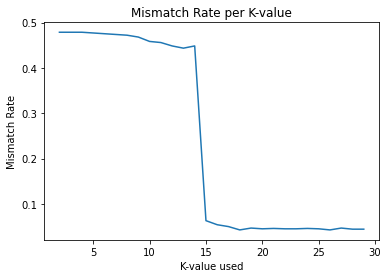

In [15]:
ks = []
means = []
for k_i in range(2,30): 
    ks.append(k_i)
    f, mr = spectral_kmeans(k_i,x,idx_sorted,nodes_processed)
    means.append(mr)
results = pd.DataFrame(ks,means).reset_index().rename({'index':'mismatch_rate',0:'k_value'},axis=1)

plt.plot('k_value','mismatch_rate',data=results)
plt.title('Mismatch Rate per K-value')
plt.xlabel('K-value used')
plt.ylabel('Mismatch Rate')
plt.show()

In [16]:
results

mismatch_rate  k_value
0        0.478758        2
1        0.478758        3
2        0.478758        4
3        0.477124        5
4        0.475490        6
5        0.473856        7
6        0.472222        8
7        0.468137        9
8        0.458469       10
9        0.456026       11
10       0.448529       12
11       0.443627       13
12       0.448529       14
13       0.062908       15
14       0.053922       16
15       0.049837       17
16       0.042484       18
17       0.046569       19
18       0.044935       20
19       0.045752       21
20       0.044935       22
21       0.044935       23
22       0.045752       24
23       0.044935       25
24       0.042484       26
25       0.046569       27
26       0.044118       28
27       0.044118       29

As can be seen, the mismatch rate drops dramatically from k=14 to k=15.The stark decline in mismatch rate at k=15 seems to show that, right when k=15, the algorithm is able to cluster away some of the data points that don't fit with the trend, allowing it to cluster the majority of the sites per political label into 2 major clusters, both with very low mismatch rates. This might be sufficient to support the hypothesis, but again, it will still be worth trying other variants of the graph Laplacian calculation to see if the clustering results change.

In the following cells, the same process will be followed to check clusters at k=2,5,10, and 20, as well as look at the mismatch rate trends for k-values 2 through 30. This time, however, in the code behind the function "spectral_setup_alternative," the diagonal matrix will be normalized, as we were shown in class, and demonstrated in the example football code. Then, L is calculated as this normalized diagonal matrix, D, multiplied by the sparse matrix, A, multiplied again by D, which is then decomposed into eigen vectors and values. Then, the eigenvectors associated with the k-**biggest** eigenvalues are chosen to create the final matrix that is input into the k-means algorithm.

The reason behind this variant of calculating the graph Laplacian is due to numerical error in the decomposition, as explained on Ed-post #24, by T.A. Pengfei Chen. This method might work best, due to the way Numpy decomposes the matrix into eigenvectors and values, in which smaller eigenvalues might inherit more and more numerical error (quoting Pengfei). 

Once this new variant of the graph Laplacian is calculated, the same process is undertaken to perform K-means, connect the points per cluster to their political label, and calculate total mismatch rate.

All analysis will be detailed below the next 3 blocks of code.

In [17]:
v_a,x_a,idx_sorted_a = spectral_setup_alternate(new_adj_df,nodes_processed)

In [18]:
k_spec = [2,5,10,20]
for k_i_a in k_spec:
    print(f'For k={k_i_a}: ')
    f_a, mr_a = spectral_kmeans(k_i_a,x_a,idx_sorted_a,nodes_processed)
    print(f_a[['political_label','label','totals','mismatch_rate']].rename({'political_label':'majority_party_label','label':'cluster_label','totals':'total_nodes_in_cluster'},axis=1).sort_values(by='cluster_label').reset_index(drop=True))
    print('===== \n')
    print(f'Weighted Mismatch rate: {round(mr_a,2)}')
    print('==========================================================')
    print('\n')

For k=2: 
   majority_party_label  cluster_label  total_nodes_in_cluster  mismatch_rate
0                     1              0                    1222       0.479542
1                     0              1                       2       0.000000
===== 

Weighted Mismatch rate: 0.48


For k=5: 
   majority_party_label  cluster_label  total_nodes_in_cluster  mismatch_rate
0                     1              0                     588       0.025510
1                     0              1                     471       0.021231
2                     1              2                      76       0.421053
3                     0              3                      79       0.025316
4                     1              4                      10       0.300000
===== 

Weighted Mismatch rate: 0.05


For k=10: 
   majority_party_label  cluster_label  total_nodes_in_cluster  mismatch_rate
0                     1              0                     205       0.024390
1                     0          

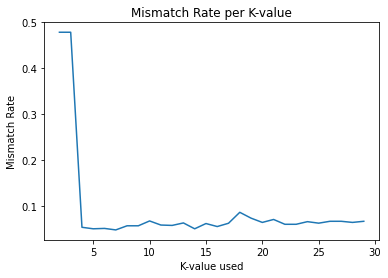

In [19]:
ks_a = []
means_a = []
for k_i in range(2,30): 
    ks_a.append(k_i)
    f_a, mr_a = spectral_kmeans(k_i,x_a,idx_sorted_a,nodes_processed)
    means_a.append(mr_a)
results_a = pd.DataFrame(ks_a,means_a).reset_index().rename({'index':'mismatch_rate',0:'k_value'},axis=1)

plt.plot('k_value','mismatch_rate',data=results_a)
plt.title('Mismatch Rate per K-value')
plt.xlabel('K-value used')
plt.ylabel('Mismatch Rate')
plt.show()

As can be seen from the graph above, using the variant of the Laplacian seems to show somewhat similar behavior as the original clustering of the L=D-A, in that, for low k-values, it has a difficult time clustering out the points, leading to one large cluster with nearly all the points in it, and a near-50% mismatch rate due to that, with a sudden dramatic drop in mismatch rate at a specific k-value. Yet, the difference with this variant-L is that the clustering algorithm is able to pick up on the differences much more quickly, at k=4. What this variant also does much better is balancing the sizes of the clusters, creating more evenly sized clusters, with some big, and some small, rather than 2 majority clusters, one per political label, as was happening in the L=D-A original version. Thus, to optimize this process, clustering on this variant of the graph Laplacian would be recommended over the original, and the reasoning behind its success is most likely due to what was explain in the Ed-post, as described above. Thus, in this case, k could be tuned at k=4.

In [20]:
results_a[0:6] # Proof of the drop in mismatch rate at k=4.

mismatch_rate  k_value
0       0.478758        2
1       0.478758        3
2       0.053922        4
3       0.050654        5
4       0.051471        6
5       0.048203        7

In summary, this analysis could serve to support the hypothesis that blog-sites with the same polticial orientation are more likely to link to each other, forming clusters. While the communities cannot necessarily be split into 2 distinct and completely isolated groups, there seems to be sub-communities within each political orientation (labeled 0 or 1). Within these sub-communities, however, a k-means algorithm is able to cluster off these communities very well, with very small mismatch rates achieved (around 5% for k$\geq$4), especially with the larger-sized clusters. As k-means is performed on the graph Laplacian of the adjacency matrix representing the references between nodes, this seems to show evidence that there are definite clusters among the nodes of the two political orientations, which refer to each other more often than other blogs of the other political orientation.